In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.svm import SVC
import time


In [10]:
# load data
data_mnist = pd.read_csv('train.csv', sep = ',')
test_mnist = pd.read_csv('testX.csv', sep = ',')
mnist_train_data = data_mnist.iloc[:,2:]
mnist_train_label = data_mnist['Label']
mnist_test_data = test_mnist.iloc[:, 1:]

# standardlize
scaler = StandardScaler()
scaler.fit(mnist_train_data)
mnist_train_data = scaler.transform(mnist_train_data)
mnist_test_data = scaler.transform(mnist_test_data)
# train, test split
train_data, validation_data, train_target, validation_target = train_test_split(mnist_train_data, mnist_train_label, test_size = 0.2, random_state = 42)

### first submission

In [ ]:
def predict_submit(y_pred):
    print("Id,Label")
    for i in range(10000):
        print('{},{}'.format(i,y_pred[i]))
              
# PCA
start = time.time_ns()
pca = PCA(n_components=60)
pca.fit(mnist_train_data)
pca5 = pca.transform(mnist_train_data)
pca_test = pca.transform(mnist_test_data)
end = time.time_ns()
time_PCA = (end - start)/1000000000
print("PCA time:{}s".format(time_PCA))
# SVM
from sklearn.svm import SVC

start = time.time()

clf = SVC(C=20,kernel = 'rbf')
clf.fit(pca5,mnist_train_label)
y_pred = clf.predict(pca_test)

end = time.time()
print("SVM time:{}s".format(end-start))


predict_submit(y_pred)

PCA time:3.044503077s
SVM time:196.98007655143738s

second:pca component = 80
PCA time:3.214057167s
SVM time:318.45545625686646s

### PCA + SVM('rbf') +component = 20

In [16]:
# PCA
start = time.time_ns()
pca = PCA(n_components=20)
pca.fit(train_data)
pca5 = pca.transform(mnist_train_data)
end = time.time_ns()
time_PCA = (end - start)/1000000000
print("PCA time:{}s".format(time_PCA))

In [ ]:
# SVM
from sklearn.svm import SVC

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)
svm_score = []
n_svmlist =[0.1,0.5,1,2,5,10,20,50]
for item in n_svmlist:
    clf = SVC(C=item,kernel = 'rbf')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accscore = accuracy_score(y_test,y_pred)
    svm_score.append(accscore)

end = time.time()
print("SVM time:{}s".format(end-start))

for i in range(len(svm_score)):
    print('C'+str(i)+':'+str(svm_score[i]))



PCA time:2.843900887s
SVM time:903.74139593234563s
result:
C0:0.82125
C1:0.8559166666666667
C2:0.86575
C3:0.8725
C4:0.879
C5:0.8844166666666666
C6:0.8859166666666667
C7:0.8873333333333333

### PCA + SVM('rbf') +component = 60

In [ ]:
# PCA
pca = PCA(n_components=60)
pca.fit(train_data)
pca5 = pca.transform(mnist_train_data)
# SVM
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)
svm_score = []
n_svmlist =[0.1,0.5,1,2,5,10,20,50]
for item in n_svmlist:
    clf = SVC(C=item,kernel = 'rbf')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accscore = accuracy_score(y_test,y_pred)
    svm_score.append(accscore)
for i in range(len(svm_score)):
    print('C'+str(i)+':'+str(svm_score[i]))

PCA time:3.021458392s
SVM time:1604.82035893112595s
C0:0.83275
C1:0.8646666666666667
C2:0.8725833333333334
C3:0.8785
C4:0.885
C5:0.8880833333333333
C6:0.8899166666666667
C7:0.8895833333333333

### PCA + SVM('rbf') +component = 80

In [ ]:
# PCA
start = time.time_ns()
pca = PCA(n_components=80)
pca.fit(train_data)
pca5 = pca.transform(mnist_train_data)

end = time.time_ns()

time_PCA = (end - start)/1000000000
print("PCA time:{}s".format(time_PCA))
# SVM
from sklearn.svm import SVC
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)
svm_score = []
n_svmlist =[10,20,30,40,50,60]
for item in n_svmlist:
    clf = SVC(C=item,kernel = 'rbf')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accscore = accuracy_score(y_test,y_pred)
    svm_score.append(accscore)
    
end = time.time()
print("SVM time:{}s".format(end-start))
for i in range(len(svm_score)):
    print('C'+str(i)+':'+str(svm_score[i]))
    

PCA time: 3.263239075s
SVM time: 2603.96125374761209s

C0:0.8895
C1:0.8913333333333333
C2:0.8906666666666667
C3:0.8915
C4:0.8900833333333333
C5:0.8885833333333333

### PCA + SVM('poly')

In [ ]:
# PCA
pca = PCA(n_components=20)
pca.fit(train_data)
pca5 = pca.transform(mnist_train_data)

In [6]:
# SVM

X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)
svm_score = []
n_svmlist =[0.1,0.5,1,2,5,10,20,50]
for item in n_svmlist:
    clf = SVC(C=item,kernel = 'poly', degree = 5)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accscore = accuracy_score(y_test,y_pred)
    svm_score.append(accscore)
for i in range(len(svm_score)):
    print('C'+str(i)+':'+str(svm_score[i]))

NameError: name 'train_test_split' is not defined

N_component = 20
PCA time:2.780412643s
SVM time:1136.248127422310933s
C0:0.7939166666666667
C1:0.8340833333333333
C2:0.84725
C3:0.8563333333333333
C4:0.8658333333333333
C5:0.8713333333333333
C6:0.8745833333333334
C7:0.8735833333333334
N_component = 60
PCA time:3.044487963s
SVM time:1576.30845123052343s
C0:0.7900833333333334
C1:0.8329166666666666
C2:0.8478333333333333
C3:0.857
C4:0.8674166666666666
C5:0.8746666666666667
C6:0.8758333333333334
C7:0.8775833333333334

### LDA + SVM'rbf'

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start = time.time_ns()

clf = LinearDiscriminantAnalysis()
mnist_train_LDA = clf.fit_transform(train_data, train_target)
mnist_validation_LDA = clf.transform(validation_data)

end = time.time_ns()

time_LDA = (end - start)/1000000000
print("LDA time:{}s".format(time_LDA))

start = time.time()

svm_score = []
n_svmlist =[0.1,0.5,1,2,5,10,20,50]
for item in n_svmlist:
    clf = SVC(C=item,kernel = 'poly', degree = 5)
    clf.fit(mnist_train_LDA,train_target)
    y_pred = clf.predict(mnist_validation_LDA)
    accscore = accuracy_score(validation_target,y_pred)
    svm_score.append(accscore)
    
end = time.time()
print("SVM time:{}s".format(end-start))
for i in range(len(svm_score)):
    print('C'+str(i)+':'+str(svm_score[i]))

LDA time:7.297011106s
SVM time:583.882063627243s
C0:0.6210833333333333
C1:0.6350833333333333
C2:0.63825
C3:0.6404166666666666
C4:0.6423333333333333
C5:0.6430833333333333
C6:0.64325
C7:0.6435833333333333

### t-SNE + SVM

In [ ]:
from sklearn.manifold import TSNE

# TSNE
start = time.time_ns()
features_TSNE = TSNE(n_components=3,random_state = 42).fit_transform(mnist_train_data)


end = time.time_ns()

time_tsne = (end - start)/1000000000
print("t-SNE time:{}s".format(time_tsne))

#SVM
from sklearn.svm import SVC
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(features_TSNE, mnist_train_label, test_size=0.2, random_state = 42)
svm_score = []
n_svmlist =[20,30,40,50,60]
for item in n_svmlist:
    clf = SVC(C=item,kernel = 'rbf')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accscore = accuracy_score(y_test,y_pred)
    svm_score.append(accscore)

end = time.time()
print("SVM time:{}s".format(end-start))
for i in range(len(svm_score)):
    print('C'+str(i)+':'+str(svm_score[i]))


t-SNE time:6354.764056569s
SVM time:229.06315207481384s
C0:0.7746666666666666
C1:0.77575
C2:0.7765
C3:0.777
C4:0.7781666666666667

### PCA + KNN component = 60

In [10]:
# PCA
pca = PCA(n_components=60)
pca.fit(train_data)
pca5 = pca.transform(mnist_train_data)

In [7]:
# KNN
n_neighborslist = list(range(1,51))
pca_knn_result = []
X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test,y_pred)
    pca_knn_result.append(accscore)
for i in range(len(n_neighborslist)):
    print(str(n_neighborslist[i]) + ': '+ str(pca_knn_result[i]))

NameError: name 'neighbors' is not defined

1: 0.80225
2: 0.80225
3: 0.824
4: 0.8305
5: 0.8329166666666666
6: 0.8389166666666666
7: 0.8401666666666666
8: 0.8440833333333333
9: 0.8423333333333334
10: 0.84475
11: 0.8450833333333333
12: 0.8459166666666667
13: 0.8460833333333333
14: 0.8469166666666667
15: 0.8446666666666667
16: 0.8459166666666667
17: 0.8453333333333334
18: 0.84525
19: 0.8444166666666667
20: 0.8451666666666666
21: 0.8436666666666667
22: 0.84475
23: 0.8426666666666667
24: 0.8439166666666666
25: 0.8430833333333333
26: 0.8438333333333333
27: 0.8416666666666667
28: 0.8429166666666666
29: 0.8410833333333333
30: 0.84175
31: 0.8406666666666667
32: 0.84125
33: 0.8404166666666667
34: 0.8404166666666667
35: 0.8393333333333334
36: 0.8375833333333333
37: 0.8373333333333334
38: 0.8371666666666666
39: 0.8365833333333333
40: 0.8369166666666666
41: 0.8364166666666667
42: 0.8365
43: 0.835
44: 0.8349166666666666
45: 0.8350833333333333
46: 0.8354166666666667
47: 0.8345
48: 0.8348333333333333
49: 0.8338333333333333
50: 0.8333333333333334


###  PCA +Random Forest component = 60

In [ ]:
# PCA
start = time.time_ns()
pca = PCA(n_components=60)
pca.fit(train_data)
pca5 = pca.transform(mnist_train_data)

end = time.time_ns()

time_PCA = (end - start)/1000000000
print("PCA time:{}s".format(time_PCA))

X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
start = time.time()
number=[150,200,300,400]
random_depth = [None,20,30,40]
result = []
for item_number in number:
    temp = []
    for depth in random_depth:
        forest = RandomForestClassifier(n_estimators=item_number,max_depth = depth,random_state=42)
        forest.fit(X_train,y_train)
        y_pred=forest.predict(X_test)
        accscore = accuracy_score(y_test,y_pred)
        temp.append(accscore)
    result.append(temp)
end = time.time()
print("RF time:{}s".format(end-start))
for i in range(len(result)):
    for j in range(len(result[i])):
        print('number = '+str(number[i])+', depth = '+str(random_depth[j])+': '+str(result[i][j]))

PCA time:2.840043629s
RF time:2376.7874476909637s
number = 150, depth = None: 0.86975
number = 150, depth = 20: 0.8654166666666666
number = 150, depth = 30: 0.8671666666666666
number = 150, depth = 40: 0.8703333333333333
number = 200, depth = None: 0.8703333333333333
number = 200, depth = 20: 0.8666666666666667
number = 200, depth = 30: 0.8690833333333333
number = 200, depth = 40: 0.8698333333333333
number = 250, depth = None: 0.869
number = 250, depth = 20: 0.8654166666666666
number = 250, depth = 30: 0.8694166666666666
number = 250, depth = 40: 0.8693333333333333
number = 300, depth = None: 0.8709166666666667
number = 300, depth = 20: 0.8674166666666666
number = 300, depth = 30: 0.869
number = 300, depth = 40: 0.8708333333333333
number = 400, depth = None: 0.87075
number = 400, depth = 20: 0.8670833333333333
number = 400, depth = 30: 0.8703333333333333
number = 400, depth = 40: 0.8699166666666667

In [ ]:
# PCA
start = time.time_ns()
pca = PCA(n_components=60)
pca.fit(train_data)
pca5 = pca.transform(mnist_train_data)

end = time.time_ns()

time_PCA = (end - start)/1000000000
print("PCA time:{}s".format(time_PCA))

X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)

#XGBoost
import xgboost as xgb

start = time.time()

xgb_model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 5000, max_depth=15, reg_alpha = 0, min_child_weight=1, colsample_bytree = 0.8, subsample = 0.8)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accscore = accuracy_score(y_test,y_pred)
end = time.time()
print("XGBoost time:{}s".format(end-start))
print(accscore)

PCA time:3.120038205s
XGBoost time:5580.873775959015s
0.8995833333333333

In [ ]:
def predict_submit(y_pred):
    print("Id,Label")
    for i in range(10000):
        print('{},{}'.format(i,y_pred[i]))
              
# PCA
start = time.time_ns()
pca = PCA(n_components=60)
pca.fit(mnist_train_data)
pca5 = pca.transform(mnist_train_data)
pca_test = pca.transform(mnist_test_data)
end = time.time_ns()
time_PCA = (end - start)/1000000000
print("PCA time:{}s".format(time_PCA))

#XGBoost
import xgboost as xgb

start = time.time()

xgb_model = xgb.XGBClassifier(learning_rate = 0.005, n_estimators = 15000, max_depth=16, reg_alpha = 0, min_child_weight=1, colsample_bytree = 0.8, subsample = 0.8)
xgb_model.fit(pca5,mnist_train_label)
y_pred = xgb_model.predict(pca_test)
end = time.time()
print("XGBoost time:{}s".format(end-start))

predict_submit(y_pred)

depth = 15
PCA time:3.017254544s
XGBoost time:12131.038144350052s
Accuracy:0.899803266

depth = 16
PCA time:3.071585728s
XGBoost time:7587.361913442612s
Accuracy:0.902023333

depth = 18
PCA time:3.071585728s
XGBoost time:7587.361913442612s
Accuracy:0.901006666

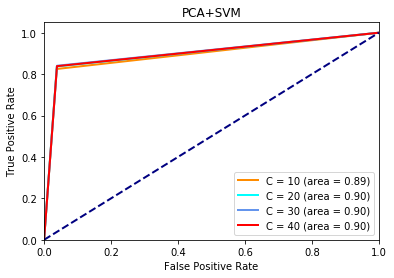

In [20]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# ROC plot
def ROCplot(y_test,y_pred):
    nb_classes = 5
    Y_valid = label_binarize(y_test, classes = [i for i in range(nb_classes)])
    Y_pred = label_binarize(y_pred, classes = [i for i in range(nb_classes)])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range (nb_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_valid[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(Y_valid.ravel(), Y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr,tpr,roc_auc

pca = PCA(n_components=60)
pca.fit(mnist_train_data)
pca5 = pca.transform(mnist_train_data)
pca_test = pca.transform(mnist_test_data)

X_train, X_test, y_train, y_test = train_test_split(pca5, mnist_train_label, test_size=0.2, random_state = 42)


clf = SVC(C=10,kernel = 'rbf')
clf.fit(X_train,y_train)
y_pred_10 = clf.predict(X_test)
svm_10 = ROCplot(y_test,y_pred_10)

clf = SVC(C=20,kernel = 'rbf')
clf.fit(X_train,y_train)
y_pred_20 = clf.predict(X_test)
svm_20 = ROCplot(y_test,y_pred_20)

clf = SVC(C=30,kernel = 'rbf')
clf.fit(X_train,y_train)
y_pred_30 = clf.predict(X_test)
svm_30 = ROCplot(y_test,y_pred_30)

clf = SVC(C=40,kernel = 'rbf')
clf.fit(X_train,y_train)
y_pred_40 = clf.predict(X_test)
svm_40 = ROCplot(y_test,y_pred_40)

plt.figure()
lw = 2
plt.plot(svm_10[0][2], svm_10[1][2], color='darkorange',
         lw=lw, label='C = 10 (area = %0.2f)' % svm_10[2][2])
plt.plot(svm_20[0][2], svm_20[1][2], color='aqua',
         lw=lw, label='C = 20 (area = %0.2f)' % svm_20[2][2])
plt.plot(svm_30[0][2], svm_30[1][2], color='cornflowerblue',
         lw=lw, label='C = 30 (area = %0.2f)' % svm_30[2][2])
plt.plot(svm_40[0][2], svm_40[1][2], color='red',
         lw=lw, label='C = 40 (area = %0.2f)' % svm_40[2][2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA+SVM')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_10)

array([[2269,   91,   17,    1,    1],
       [ 113, 2136,  135,   33,    7],
       [  27,  187, 1949,  162,   39],
       [   0,   41,  178, 2027,  121],
       [   6,   12,   33,  136, 2279]])

In [28]:
confusion_matrix(y_test,y_pred_20)

array([[2267,   94,   17,    0,    1],
       [ 119, 2124,  139,   36,    6],
       [  29,  174, 1979,  146,   36],
       [   0,   37,  176, 2031,  123],
       [   5,   10,   35,  128, 2288]])

In [37]:
pred_test = pd.read_csv('XGBoostpred.csv', sep = ',')
XGBoostpred = pred_test['pred_Label']
XGBoosttest = pred_test['test_Label']
confusion_matrix(XGBoosttest,XGBoostpred)
from sklearn.metrics import precision_score
precision_score(XGBoosttest,XGBoostpred, average='macro')
from sklearn.metrics import recall_score
recall_score(XGBoosttest,XGBoostpred,average='macro')
from sklearn.metrics import f1_score
f1_score(XGBoosttest,XGBoostpred, average='macro')

0.8980284033001233

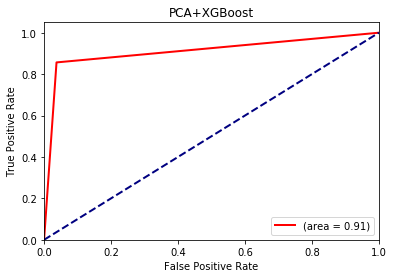

In [35]:
XGBoostROC = ROCplot(XGBoosttest,XGBoostpred)
plt.figure()
lw = 2
plt.plot(XGBoostROC[0][2], XGBoostROC[1][2], color='red',
         lw=lw, label='(area = %0.2f)' % XGBoostROC[2][2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA+XGBoost')
plt.legend(loc="lower right")
plt.show()